# Time Series Forecasting (exponential smoothing) in R
#### This is a practice of what's on https://otexts.com/fpp2/ets-forecasting.html
#### Data is from https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
#### & https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [20]:
# Load the libraries.
library(forecast)
library(fpp2)

In [21]:
# Read data
Data <- read.csv('us-states.csv', header=TRUE)

# date and state come in as factors. Change them to characters.
Data$date  <- as.Date(Data$date)
Data$state <- as.character(Data$state)

# Cursory check
Data

date,state,fips,cases,deaths
<date>,<chr>,<int>,<int>,<int>
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0


In [22]:
# Run this cell to get the latest data.
url  <- 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
Data <- read.csv(url, header=TRUE)

# date and state come in as factors. Change them to characters.
Data$date  <- as.Date(Data$date)
Data$state <- as.character(Data$state)

# Cursory check
Data

date,state,fips,cases,deaths
<date>,<chr>,<int>,<int>,<int>
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0


In [23]:
# Consolidate California cases as CA data frame.
# Aggregate all states as US data frame.
# Calculate differences between rows. This is is daily_new
library(dplyr)

CA <- Data[(Data$state=='California'),c('date','cases')] %>% mutate(daily_new=c(0, diff(cases)))
CA

US <- aggregate(cases ~ date, data=Data, sum) %>% mutate(daily_new=c(0, diff(cases)))
US

date,cases,daily_new
<date>,<int>,<dbl>
2020-01-25,1,0
2020-01-26,2,1
2020-01-27,2,0
2020-01-28,2,0
2020-01-29,2,0
2020-01-30,2,0
2020-01-31,3,1
2020-02-01,3,0
2020-02-02,6,3


date,cases,daily_new
<date>,<int>,<dbl>
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,1
2020-01-25,3,1
2020-01-26,5,2
2020-01-27,5,0
2020-01-28,5,0
2020-01-29,5,0


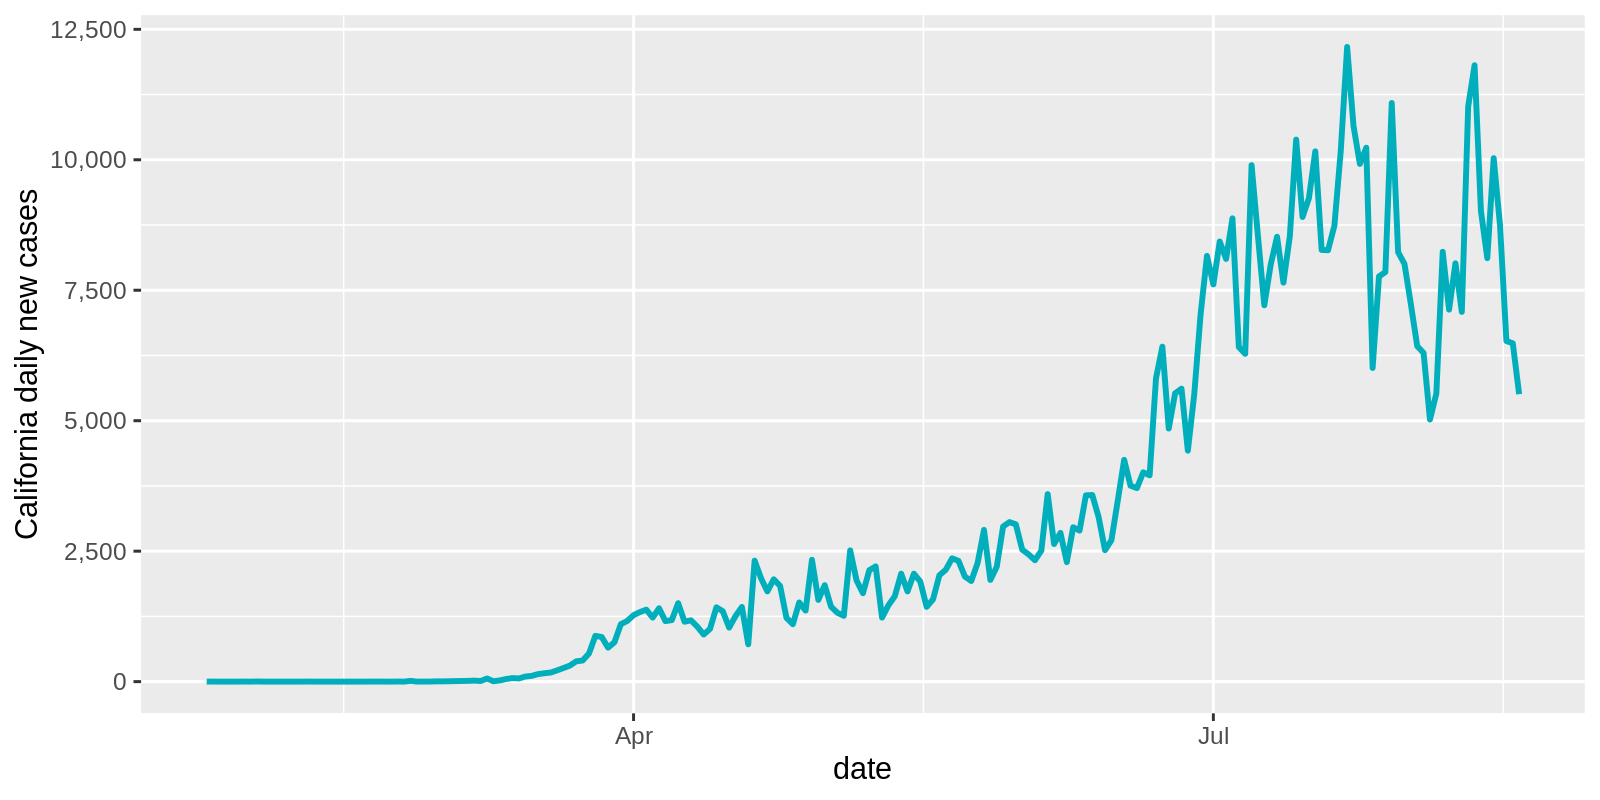

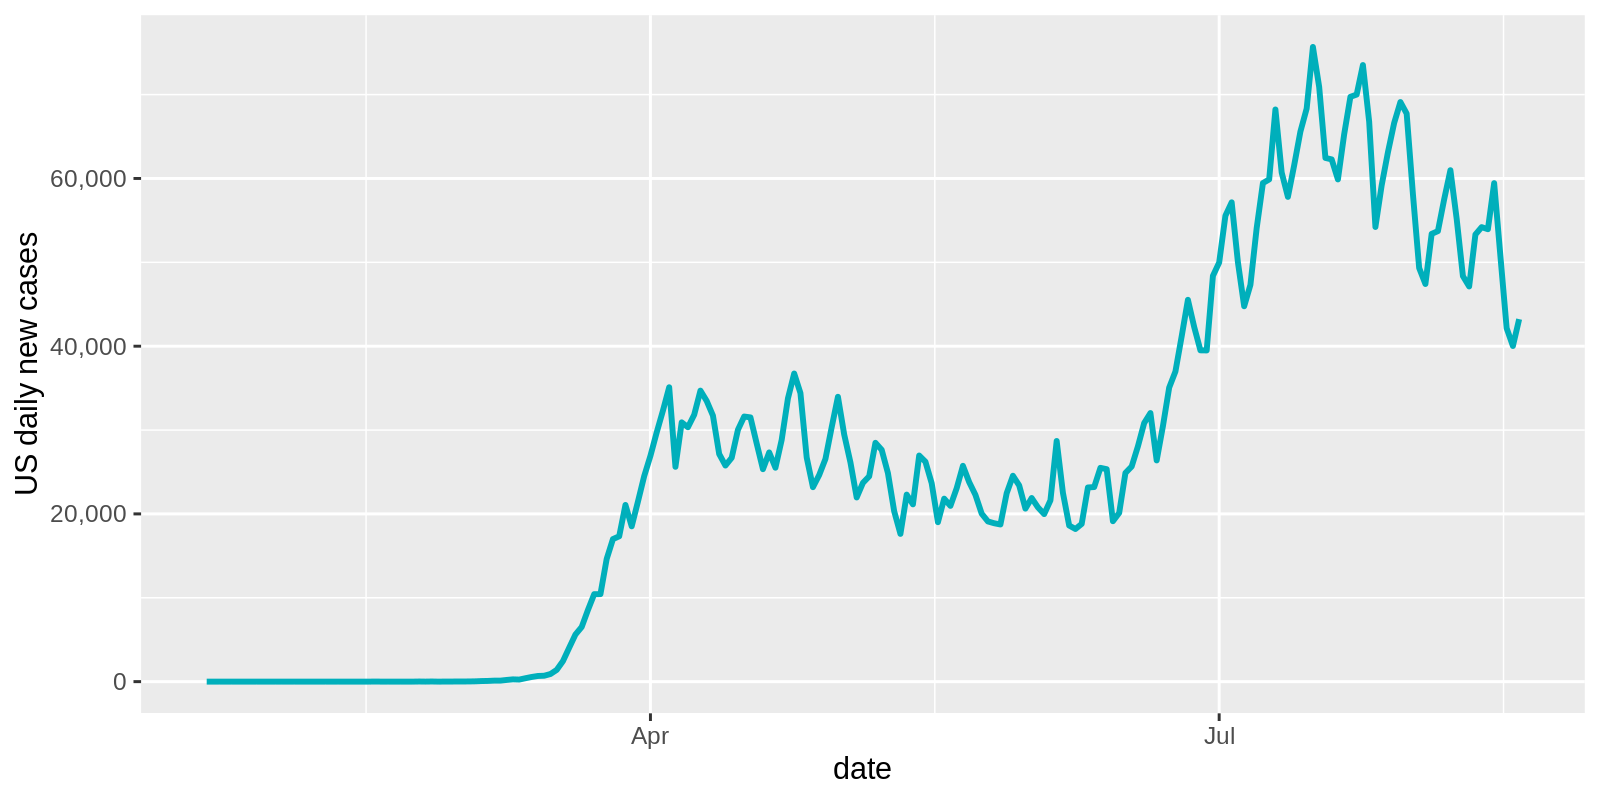

In [24]:
# Plot 'daily_new'(y) vs 'date'(x) for California
options(repr.plot.height=4, repr.plot.width=8, repr.plot.res = 200)
ggplot(data = CA, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)

# Plot 'daily_new'(y) vs 'date'(x) for US
ggplot(data = US, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [25]:
# Select data where daily_new becomes >=100
day1 <- CA %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
CA <- CA[CA$date>=day1$date,]
CA

day1 <- US %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
US <- US[US$date>=day1$date,]
US

,date,cases,daily_new
,<date>,<int>,<dbl>
52,2020-03-16,588,110
53,2020-03-17,732,144
54,2020-03-18,893,161
55,2020-03-19,1067,174
56,2020-03-20,1283,216
57,2020-03-21,1544,261
58,2020-03-22,1851,307
59,2020-03-23,2240,389
60,2020-03-24,2644,404


,date,cases,daily_new
,<date>,<int>,<dbl>
47,2020-03-07,428,117
48,2020-03-08,547,119
49,2020-03-09,748,201
50,2020-03-10,1018,270
51,2020-03-11,1263,245
52,2020-03-12,1668,405
53,2020-03-13,2224,556
54,2020-03-14,2898,674
55,2020-03-15,3600,702


In [26]:
# Convert the data frames to time series.
CAts = ts(CA$daily_new, frequency=7)
print(CAts, calendar = TRUE)

USts = ts(US$daily_new, frequency=7)
print(USts, calendar = TRUE)

      p1    p2    p3    p4    p5    p6    p7
1    110   144   161   174   216   261   307
2    389   404   539   877   855   651   755
3   1100  1162  1274  1333  1379  1227  1406
4   1159  1179  1503  1148  1175  1055   902
5   1011  1424  1349  1035  1256  1431   715
6   2318  1982  1729  1961  1834  1222  1101
7   1517  1362  2334  1566  1848  1435  1319
8   1261  2515  1939  1694  2135  2208  1227
9   1463  1636  2068  1729  2068  1918  1433
10  1577  2038  2144  2363  2313  2014  1928
11  2274  2907  1949  2198  2972  3057  3014
12  2529  2438  2326  2510  3593  2637  2850
13  2290  2958  2894  3570  3576  3149  2519
14  2709  3469  4250  3754  3708  4011  3953
15  5813  6419  4850  5524  5614  4426  5502
16  7040  8158  7611  8434  8100  8878  6411
17  6282  9897  8538  7212  7989  8525  7646
18  8530 10387  8904  9264 10161  8272  8266
19  8735 10171 12162 10647  9921 10231  6011
20  7765  7848 11088  8230  8004  7234  6430
21  6298  5023  5518  8237  7129  8016  7086
22 11023 1

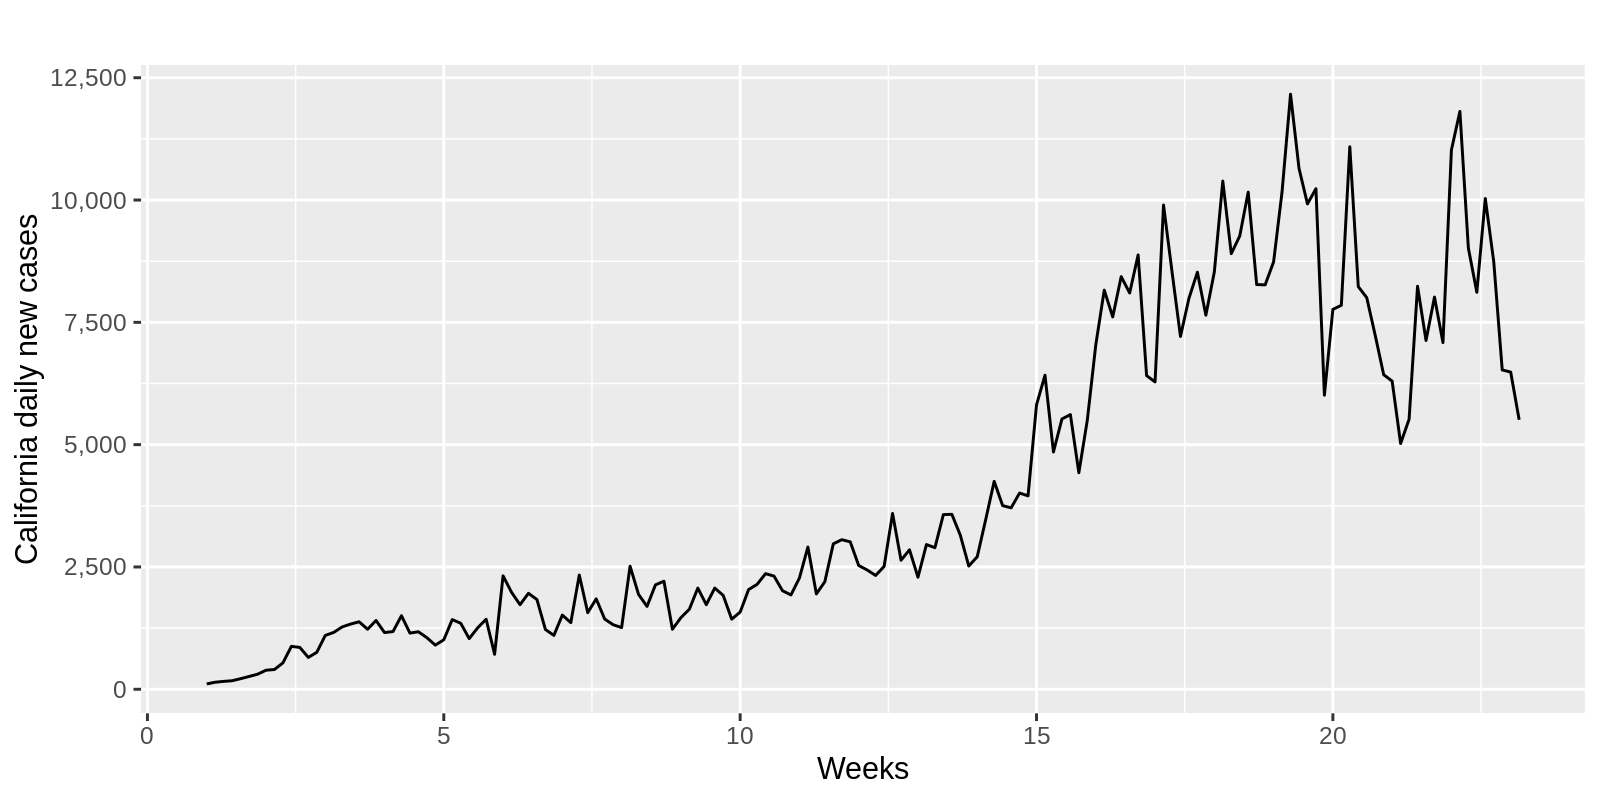

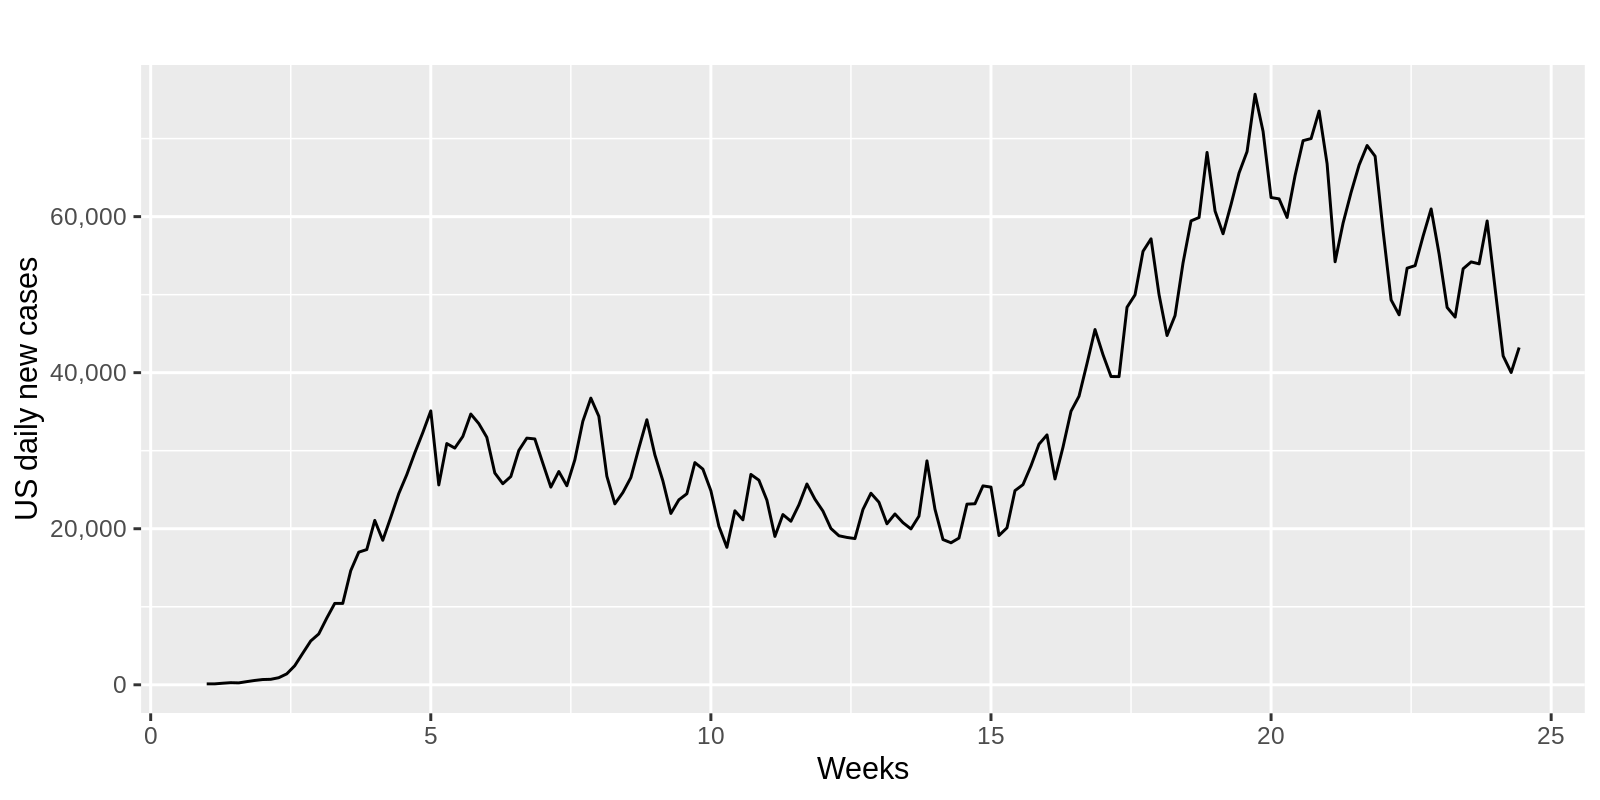

In [27]:
# Check the time series data
autoplot(CAts) +
    xlab("Weeks") +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)
autoplot(USts) +
    xlab("Weeks") +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [28]:
# Forecase California data first
fit <- ets(CAts, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL,
    gamma=NULL, phi=NULL, lambda=NULL, biasadj=FALSE,
    additive.only=FALSE, restrict=TRUE,
    allow.multiplicative.trend=FALSE)
summary(fit)

ETS(M,A,N) 

Call:
 ets(y = CAts, model = "ZZZ", damped = NULL, alpha = NULL, beta = NULL,  

 Call:
     gamma = NULL, phi = NULL, additive.only = FALSE, lambda = NULL,  

 Call:
     biasadj = FALSE, restrict = TRUE, allow.multiplicative.trend = FALSE) 

  Smoothing parameters:
    alpha = 0.3163 
    beta  = 1e-04 

  Initial states:
    l = 50.4607 
    b = 44.5823 

  sigma:  0.2204

     AIC     AICc      BIC 
2796.777 2797.177 2812.026 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 1.796127 1016.469 657.1685 -4.053776 17.40578 0.6655481 0.3039405


In [29]:
# Smoothing parameters
#    alpha: the smoothing parameter for level
#    beta:  the smoothing parameter for the trend
#    gamma: the smoothing parameter for the seasonal component
#    phi:   damping parameter. this dampens the effect of trend to the forecasting. In practice rarely less than 0.8.
#
# Traditionally, 0<beta<alpha<1, 0<gamma<1-alpha, 0.8<phi<0.98
#
# Level: the smoothed value of the series at time t (a weighted average of observation y_t).
# trend: a long-term increase or decrease in the data. sometimes we will refer to a trend as "changing direction", 
#         when it might go from an increasing trend to a decreasing trend.
# slope: the average predicted change in y resulting from a one unit increase in x. This is really the usual 'slope'.
#
# AIC:   Akaike's Information Criterion. It is to penalize the fit of the model (SSE) with thenumber of parameters that 
#        need to be estimated. The model with the minimum value of the AIC is often the best model for forecasting.
# AICc:  Corrected Akaike's Information Criterion. For small number of observations, the AIC tends to select too many
#        predictors, and so a bias-corrected version of the AIC has been developed.
# BIC:   Schwarz's Bayesian Information Criterion. BIC penalizes the number of parameters more heavily than the AIC.
#        Minimizing the BIC is intended to give the best model.
#

In [30]:
coef(fit)
accuracy(fit)

alpha         beta            l            b 
 0.316276723  0.000100126 50.460689599 44.582326227

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.796127,1016.469,657.1685,-4.053776,17.40578,0.6655481,0.3039405


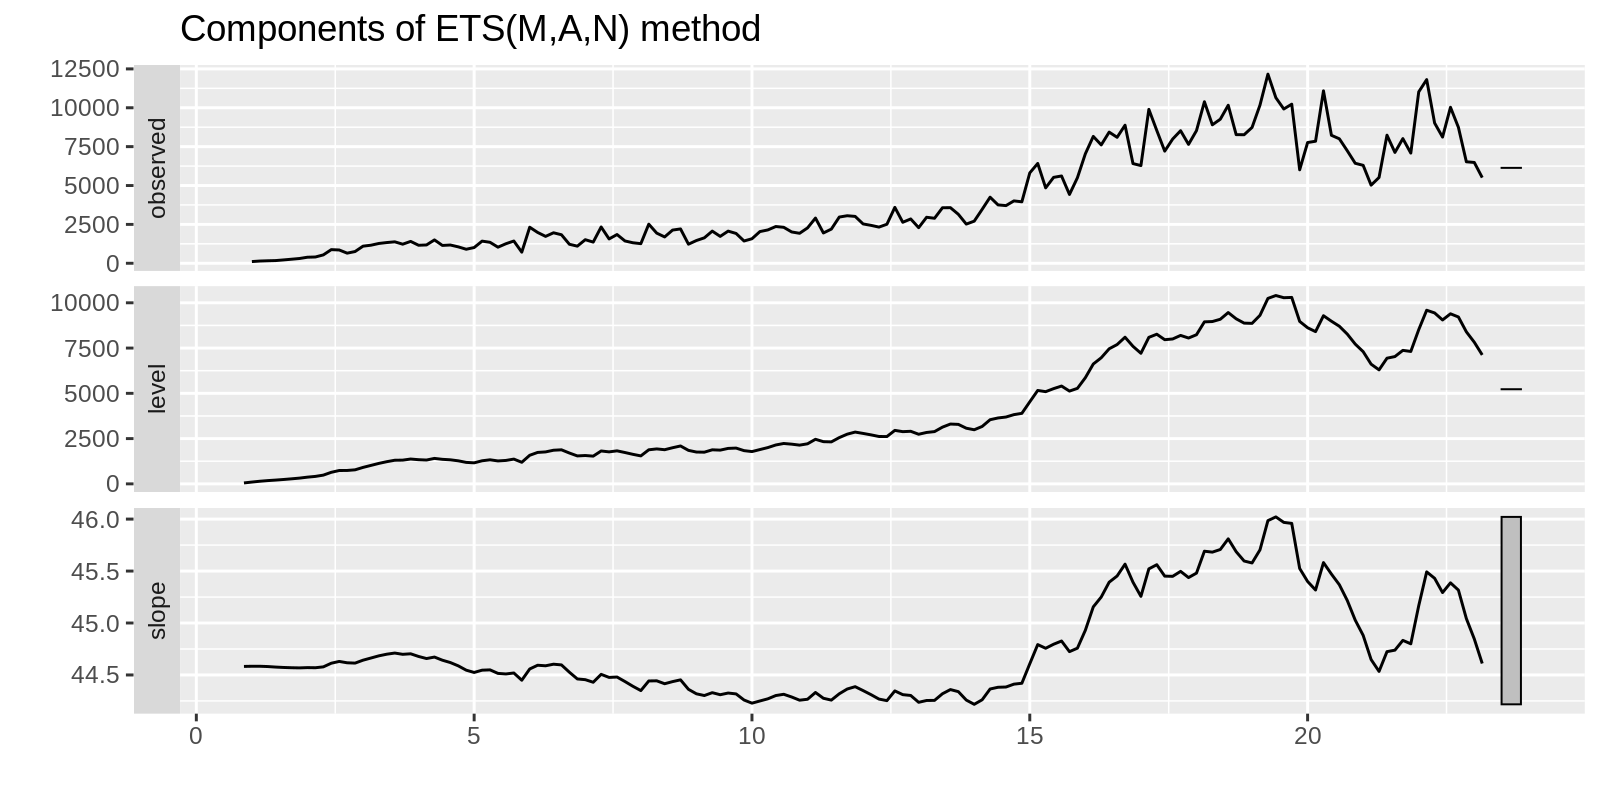

In [31]:
autoplot(fit)

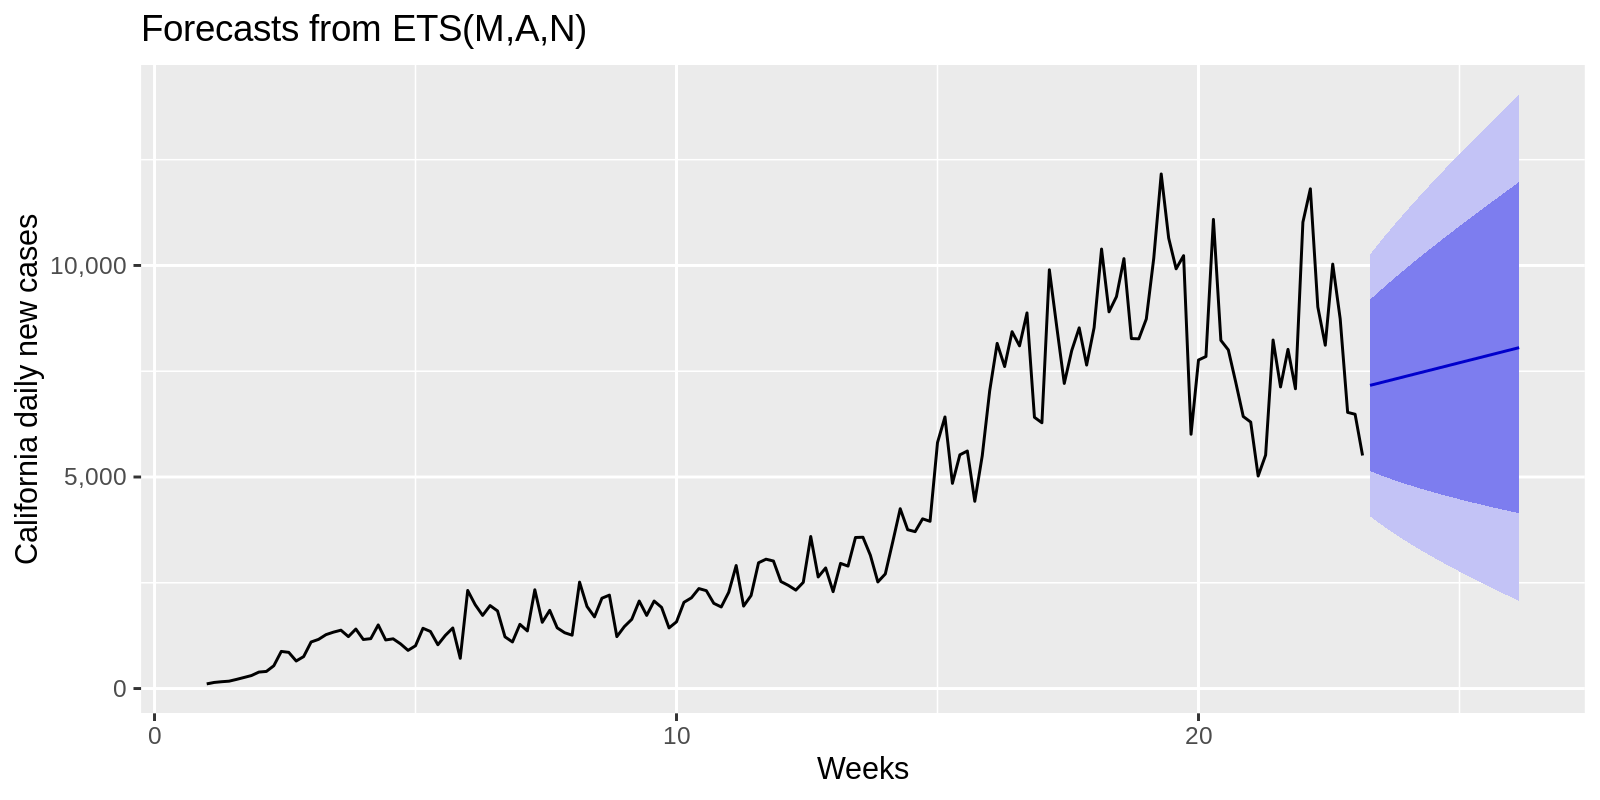

In [32]:
fit %>% forecast(h=21) %>%
  autoplot() +
  xlab('Weeks') + 
  scale_y_continuous(name='California daily new cases', labels = scales::comma)

In [33]:
fit %>% forecast(h=21)

         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
23.28571       7165.699 5141.937  9189.461 4070.622 10260.78
23.42857       7210.310 5071.005  9349.614 3938.526 10482.09
23.57143       7254.920 5004.213  9505.627 3812.761 10697.08
23.71429       7299.530 4940.958  9658.103 3692.405 10906.66
23.85714       7344.141 4880.760  9807.522 3576.725 11111.56
24.00000       7388.751 4823.229  9954.274 3465.123 11312.38
24.14286       7433.362 4768.044 10098.679 3357.110 11509.61
24.28571       7477.972 4714.938 10241.006 3252.275 11703.67
24.42857       7522.582 4663.682 10381.483 3150.272 11894.89
24.57143       7567.193 4614.084 10520.301 3050.803 12083.58
24.71429       7611.803 4565.978 10657.628 2953.615 12269.99
24.85714       7656.413 4519.217 10793.610 2858.486 12454.34
25.00000       7701.024 4473.676 10928.371 2765.222 12636.83
25.14286       7745.634 4429.243 11062.025 2673.652 12817.62
25.28571       7790.245 4385.820 11194.669 2583.626 12996.86
25.42857       7834.855 

In [34]:
# Forecase US cases
fit <- ets(USts, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL,
    gamma=NULL, phi=NULL, lambda=NULL, biasadj=FALSE,
    additive.only=FALSE, restrict=TRUE,
    allow.multiplicative.trend=FALSE)
summary(fit)

ETS(A,N,A) 

Call:
 ets(y = USts, model = "ZZZ", damped = NULL, alpha = NULL, beta = NULL,  

 Call:
     gamma = NULL, phi = NULL, additive.only = FALSE, lambda = NULL,  

 Call:
     biasadj = FALSE, restrict = TRUE, allow.multiplicative.trend = FALSE) 

  Smoothing parameters:
    alpha = 0.9313 
    gamma = 1e-04 

  Initial states:
    l = 1709.5188 
    s = 4458.771 2911.411 378.6761 -1237.884 -3585.812 -3877.828
           952.666

  sigma:  2906.23

     AIC     AICc      BIC 
3484.848 3486.277 3515.908 

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE     MASE        ACF1
Training set 277.9232 2825.858 2288.193 3.885133 68.30453 0.433332 -0.01090274


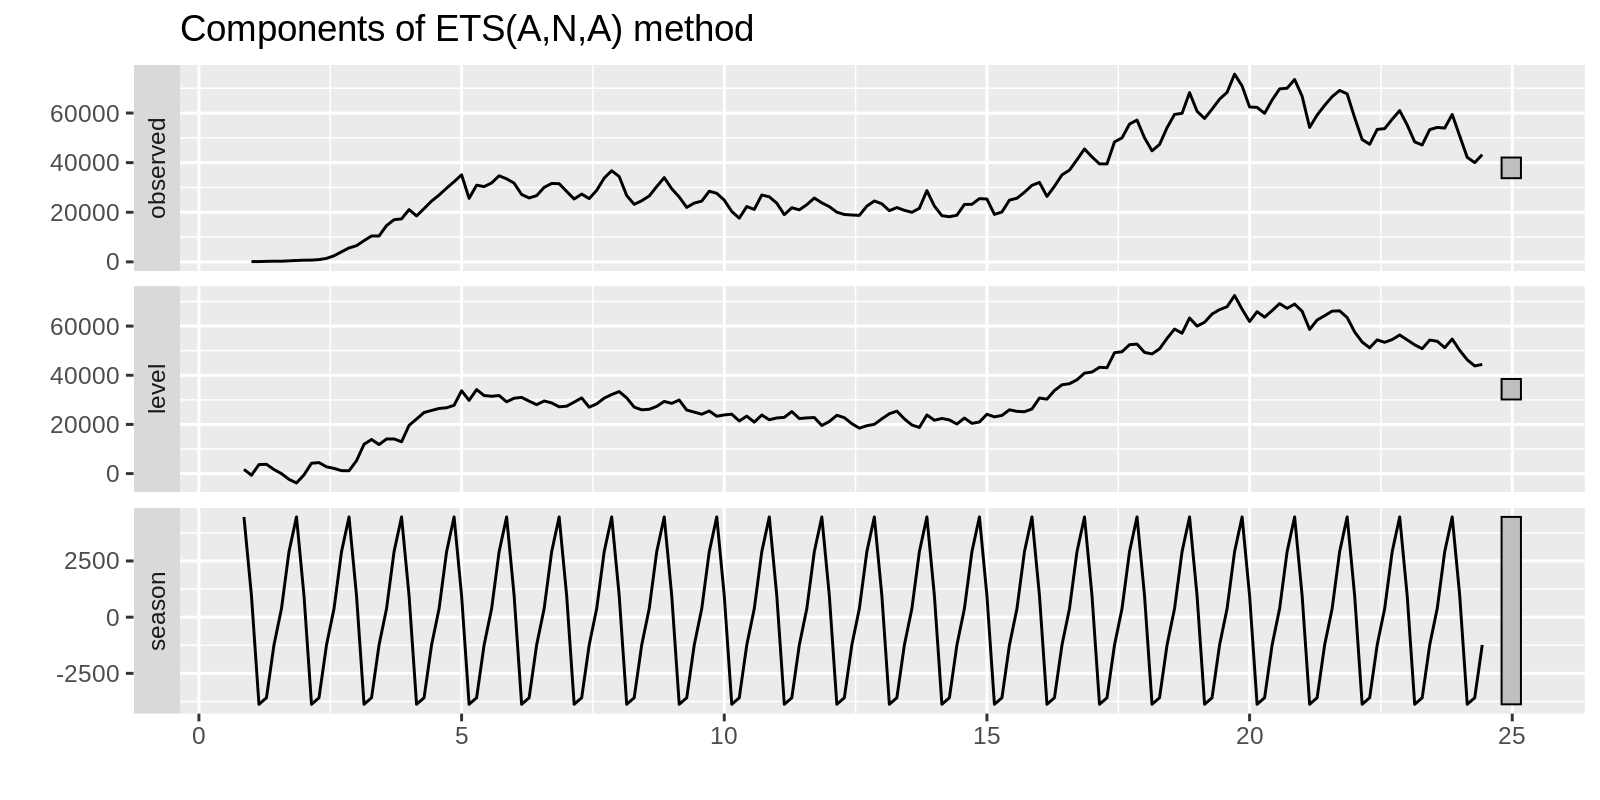

In [35]:
autoplot(fit)

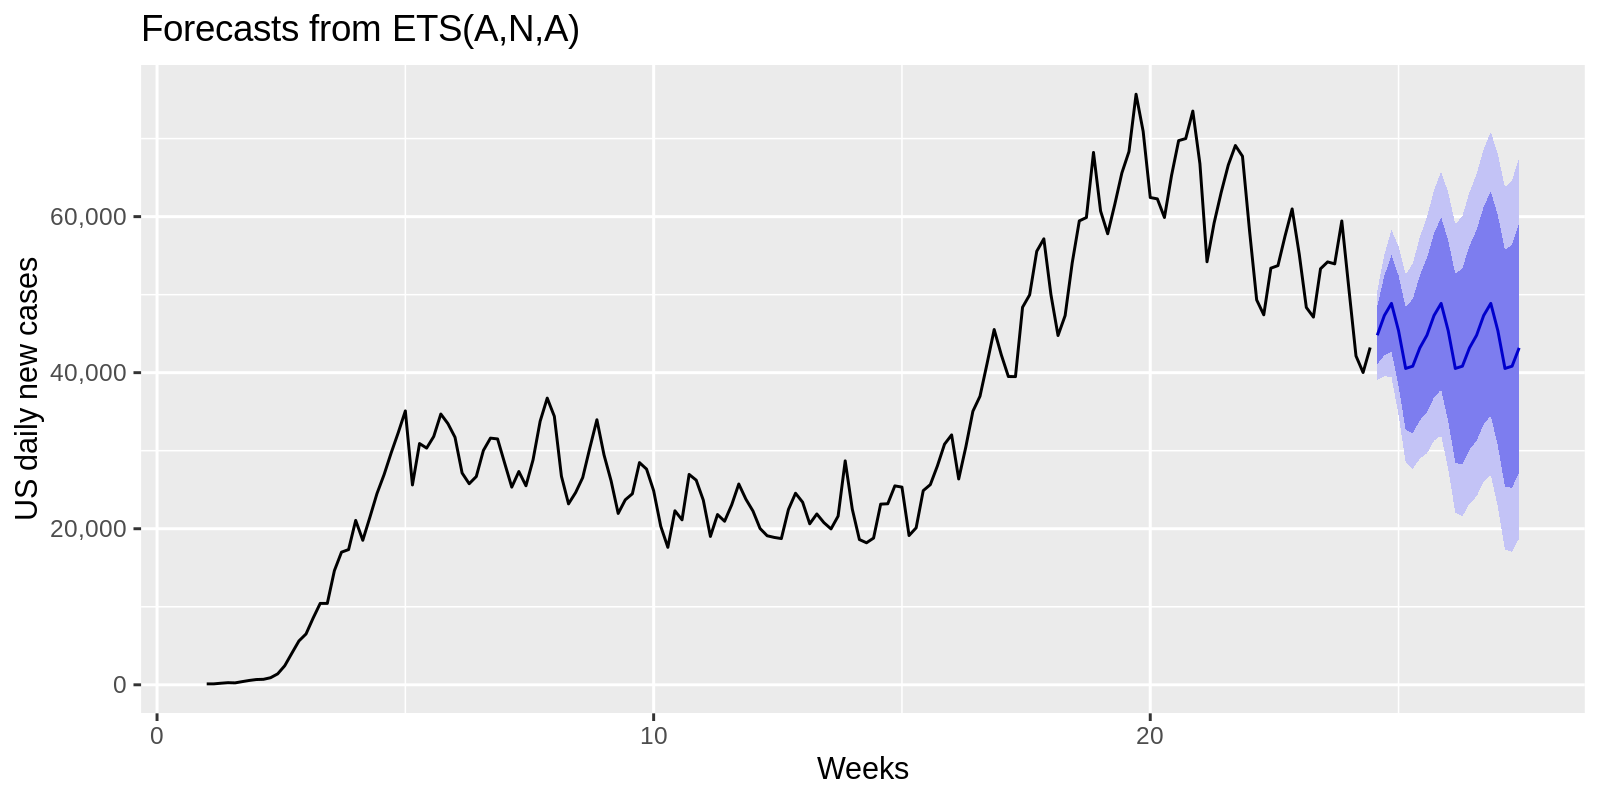

In [36]:
fit %>% forecast(h=21) %>%
  autoplot() +
  xlab('Weeks') + 
  scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [37]:
fit %>% forecast(h=21)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
24.57143       44796.66 41072.17 48521.14 39100.55 50492.77
24.71429       47329.29 42239.74 52418.83 39545.50 55113.08
24.85714       48876.61 42717.45 55035.77 39456.99 58296.23
25.00000       45370.29 38301.56 52439.01 34559.60 56180.97
25.14286       40540.37 32666.45 48414.29 28498.25 52582.49
25.28571       40831.98 32227.90 49436.07 27673.17 53990.80
25.42857       43179.96 33902.86 52457.06 28991.86 57368.06
25.57143       44796.66 34892.30 54701.02 29649.25 59944.07
25.71429       47329.29 36835.10 57823.48 31279.81 63378.77
25.85714       48876.61 37824.02 59929.20 31973.13 65780.09
26.00000       45370.29 33786.18 56954.39 27653.93 63086.64
26.14286       40540.37 28448.09 52632.64 22046.83 59033.91
26.28571       40831.98 28252.04 53411.92 21592.63 60071.34
26.42857       43179.96 30130.47 56229.45 23222.49 63137.43
26.57143       44796.66 31294.03 58299.28 24146.18 65447.14
26.71429       47329.29 33388.25 61270.3